# PROJECT TITLE

# AN ANALYSIS OF PAYMENT BEHAVIOUR OF CUSTOMERS FOR POA INTERNET COMPANY
## Introduction

- This a project to analyze customers deliquency (Late renewal plan for 7 days) for an internet company called Poa. 
- This Project aims in finding the cause problems find the solution and give recommendations to the managemnet

# Project Description

# Project Questions

1. Analyse the data to understand customer conversion, reachability of customers by day of week, as well as individual agent perfomance.
2. Are there any other metrics you have uncovered? If so, highlight them.
3. Using your findings, tell the data story of the pilot so far. How has it been performing? What would you recommend we keep doing? What would you recommend we stop doing? What would you recommend we explore further?

# Project Hypothesis

Null: Customers who have a month-to-month contract, and have an average payment delay per week do not accept the new offer(periodic).

Atlternative: Customers who have a month-to-month contract,and   have an average payment delay per week accept the offer(periodic billing).

# DATA UNDERSTANDING

The data for this project is in a csv format. The following describes the columns present in the data.


Date- This is the date the agent contacted the customer

Agent name- the name of the Company's Agent

Response- The feedback the customer made after the call

uid- the user id

Converted?- the result 

average payment delay before weekly (days)

revenue per day before weekly

revenue per day after weekly

# LIBRARIES IMPORTATION

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# For creating plots
import seaborn as sns 

# For specifying the axes tick format
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt

sns.set(style = 'white')


import os
from sklearn import preprocessing

#data split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


#label encoding
from sklearn.preprocessing import OneHotEncoder


# DATASET IMPORTATION

In [2]:
Data=pd.read_csv("E:\\MIKE\\POA\\Project_poa\\Analytics_Associate_Interview_test.csv")

In [3]:
Data.head()

,Date,Agent name,Response,uid,Converted?,average payment delay before weekly (days),revenue per day before weekly,revenue per day after weekly,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,8/6/2023,Rose Kanyiri,No-financial constraints,126022,No,2,43.0,43.0,NaN,NaN,NaN
1,7/6/2023,Allan Mutuota,No- low priority,101372,No,1,33.0,33.0,NaN,NaN,NaN
2,7/5/2023,Greyson Ochanda,No- low priority,104620,No,5,28.0,28.0,NaN,NaN,NaN
3,8/31/2023,Allan Mutuota,No- service dissatisfaction,28997,No,3,41.0,41.0,NaN,NaN,NaN
4,9/13/2023,Rose Kanyiri,No- low priority,76405,No,4,29.0,29.0,NaN,NaN,NaN


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Date                                        1961 non-null   object 
 1   Agent name                                  1961 non-null   object 
 2   Response                                    1961 non-null   object 
 3   uid                                         1961 non-null   int64  
 4   Converted?                                  1961 non-null   object 
 5   average payment delay before weekly (days)  1961 non-null   int64  
 6   revenue per day before weekly               1961 non-null   float64
 7   revenue per day after weekly                1961 non-null   float64
 8   Unnamed: 8                                  0 non-null      float64
 9   Unnamed: 9                                  0 non-null      float64
 10  Unnamed: 10 

In [5]:
Data.shape

(1961, 11)

In [6]:
Data.columns.values

array(['Date', 'Agent name', 'Response', 'uid', 'Converted?',
       'average payment delay before weekly (days)',
       'revenue per day before weekly', 'revenue per day after weekly',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], dtype=object)

# Data Cleaning

In [7]:
# lets first check the data types of all columns
Data.dtypes

Date                                           object
Agent name                                     object
Response                                       object
uid                                             int64
Converted?                                     object
average payment delay before weekly (days)      int64
revenue per day before weekly                 float64
revenue per day after weekly                  float64
Unnamed: 8                                    float64
Unnamed: 9                                    float64
Unnamed: 10                                   float64
dtype: object

In [8]:
# Change the date columns from object to date
Data['Date']=pd.to_datetime(Data['Date'])


In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Date                                        1961 non-null   datetime64[ns]
 1   Agent name                                  1961 non-null   object        
 2   Response                                    1961 non-null   object        
 3   uid                                         1961 non-null   int64         
 4   Converted?                                  1961 non-null   object        
 5   average payment delay before weekly (days)  1961 non-null   int64         
 6   revenue per day before weekly               1961 non-null   float64       
 7   revenue per day after weekly                1961 non-null   float64       
 8   Unnamed: 8                                  0 non-null      float64       
 9   Unnamed:

In [10]:
#Checking for missing values
Data.isnull().sum()

Date                                             0
Agent name                                       0
Response                                         0
uid                                              0
Converted?                                       0
average payment delay before weekly (days)       0
revenue per day before weekly                    0
revenue per day after weekly                     0
Unnamed: 8                                    1961
Unnamed: 9                                    1961
Unnamed: 10                                   1961
dtype: int64

In [11]:
#Dropping the unamed columns since we do not need it
columns_to_remove=[8, 9,10]
df2=Data.drop(Data.columns[columns_to_remove], axis=1)

In [12]:
df2.head()

,Date,Agent name,Response,uid,Converted?,average payment delay before weekly (days),revenue per day before weekly,revenue per day after weekly
0,2023-08-06,Rose Kanyiri,No-financial constraints,126022,No,2,43.0,43.0
1,2023-07-06,Allan Mutuota,No- low priority,101372,No,1,33.0,33.0
2,2023-07-05,Greyson Ochanda,No- low priority,104620,No,5,28.0,28.0
3,2023-08-31,Allan Mutuota,No- service dissatisfaction,28997,No,3,41.0,41.0
4,2023-09-13,Rose Kanyiri,No- low priority,76405,No,4,29.0,29.0


In [13]:
#Checking for missing values for df2
df2.isnull().sum()

Date                                          0
Agent name                                    0
Response                                      0
uid                                           0
Converted?                                    0
average payment delay before weekly (days)    0
revenue per day before weekly                 0
revenue per day after weekly                  0
dtype: int64

We can now change column names so as to remove the spaces in between the columns

In [14]:
df2.rename(columns={'Agent name': 'Agent_name', 'average payment delay before weekly (days)': 'average_payment_delay_beforeweekly','revenue per day before weekly':'revenue_per_day_beforeweekly','revenue per day after weekly':'revenue_per_day_afterweekly'}, inplace=True)
df2.head()

,Date,Agent_name,Response,uid,Converted?,average_payment_delay_beforeweekly,revenue_per_day_beforeweekly,revenue_per_day_afterweekly
0,2023-08-06,Rose Kanyiri,No-financial constraints,126022,No,2,43.0,43.0
1,2023-07-06,Allan Mutuota,No- low priority,101372,No,1,33.0,33.0
2,2023-07-05,Greyson Ochanda,No- low priority,104620,No,5,28.0,28.0
3,2023-08-31,Allan Mutuota,No- service dissatisfaction,28997,No,3,41.0,41.0
4,2023-09-13,Rose Kanyiri,No- low priority,76405,No,4,29.0,29.0


In [15]:
df2.shape

(1961, 8)

In [16]:
#our new df2 has 1961 rows and 8 columns, we are good to go to EDA

# Label Encoding for the Target Class

In [17]:
#Converting the target variable in a binary numeric variable
label_encoder = preprocessing.LabelEncoder()
df2['Converted?']=label_encoder.fit_transform(df2['Converted?'])

In [18]:
df2.head()

,Date,Agent_name,Response,uid,Converted?,average_payment_delay_beforeweekly,revenue_per_day_beforeweekly,revenue_per_day_afterweekly
0,2023-08-06,Rose Kanyiri,No-financial constraints,126022,0,2,43.0,43.0
1,2023-07-06,Allan Mutuota,No- low priority,101372,0,1,33.0,33.0
2,2023-07-05,Greyson Ochanda,No- low priority,104620,0,5,28.0,28.0
3,2023-08-31,Allan Mutuota,No- service dissatisfaction,28997,0,3,41.0,41.0
4,2023-09-13,Rose Kanyiri,No- low priority,76405,0,4,29.0,29.0


In [19]:
Data.head()

,Date,Agent name,Response,uid,Converted?,average payment delay before weekly (days),revenue per day before weekly,revenue per day after weekly,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,2023-08-06,Rose Kanyiri,No-financial constraints,126022,No,2,43.0,43.0,NaN,NaN,NaN
1,2023-07-06,Allan Mutuota,No- low priority,101372,No,1,33.0,33.0,NaN,NaN,NaN
2,2023-07-05,Greyson Ochanda,No- low priority,104620,No,5,28.0,28.0,NaN,NaN,NaN
3,2023-08-31,Allan Mutuota,No- service dissatisfaction,28997,No,3,41.0,41.0,NaN,NaN,NaN
4,2023-09-13,Rose Kanyiri,No- low priority,76405,No,4,29.0,29.0,NaN,NaN,NaN


In [20]:
#Converting the target variable in a binary numeric variable
df2['Converted?'].replace(to_replace='Yes', value=1, inplace=True)
df2['Converted?'].replace(to_replace='No',  value=0, inplace=True)

In [21]:
df2.head()

,Date,Agent_name,Response,uid,Converted?,average_payment_delay_beforeweekly,revenue_per_day_beforeweekly,revenue_per_day_afterweekly
0,2023-08-06,Rose Kanyiri,No-financial constraints,126022,0,2,43.0,43.0
1,2023-07-06,Allan Mutuota,No- low priority,101372,0,1,33.0,33.0
2,2023-07-05,Greyson Ochanda,No- low priority,104620,0,5,28.0,28.0
3,2023-08-31,Allan Mutuota,No- service dissatisfaction,28997,0,3,41.0,41.0
4,2023-09-13,Rose Kanyiri,No- low priority,76405,0,4,29.0,29.0


In [22]:
#df2.to_csv('PowerBi.csv')

In [23]:
df2.to_csv('PowerBi.csv')
df2.to_csv('Lookerstudio.csv')

# EXPLATORY DATA ANALYSIS

# Unariate Analysis

1. Let us first start with exploring our data set, to better understand the patterns in the data and potentially form some hypothesis. First we will look at the distribution of individual variables and then slice and dice our data for any interesting trends.

First lets check the percentage of the customers response , how many said yes how many said no! 

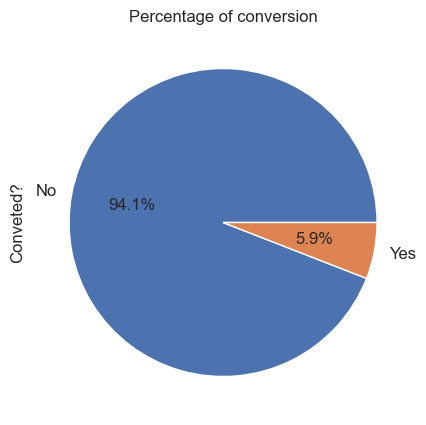

In [24]:
ax = (df2['Converted?'].value_counts()*100.0 /len(df2))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Conveted?',fontsize = 12)
ax.set_title('Percentage of conversion', fontsize = 12)

plt.show()


We clearly see many customers said No  with a percentage of 94.1 and those who said yes are only 5.9 . We need to investigate why this was the response!

## Let us add the Days of the week column from Date column

In [25]:
df2['Day_of_Week'] = df2['Date'].dt.day_name()
df2.head()


,Date,Agent_name,Response,uid,Converted?,average_payment_delay_beforeweekly,revenue_per_day_beforeweekly,revenue_per_day_afterweekly,Day_of_Week
0,2023-08-06,Rose Kanyiri,No-financial constraints,126022,0,2,43.0,43.0,Sunday
1,2023-07-06,Allan Mutuota,No- low priority,101372,0,1,33.0,33.0,Thursday
2,2023-07-05,Greyson Ochanda,No- low priority,104620,0,5,28.0,28.0,Wednesday
3,2023-08-31,Allan Mutuota,No- service dissatisfaction,28997,0,3,41.0,41.0,Thursday
4,2023-09-13,Rose Kanyiri,No- low priority,76405,0,4,29.0,29.0,Wednesday


In [74]:
#Here we determine the reachabilty of the customers by Day i.e which day are the customers more rechable
reachability_by_day = df2.groupby('Day_of_Week')['Response'].value_counts().unstack()


In [76]:
 reachability_by_day['Total_Responses'] = reachability_by_day.sum(axis=1)

# We Sort the DataFrame based on the 'Total_Responses' column in descending order
reachability_by_day_sorted = reachability_by_day.sort_values(by='Total_Responses', ascending=False)

# Display the sorted DataFrame
reachability_by_day_sorted


Response,No- low priority,No- service dissatisfaction,No-financial constraints,Not reachable,Yes- affordable,Total_Responses
Day_of_Week,,,,,,
Friday,109,9,54,23,119,628
Saturday,92,12,36,14,141,590
Thursday,97,13,46,18,118,584
Sunday,81,12,37,23,125,556
Wednesday,81,15,41,22,116,550
Monday,79,10,49,20,103,522
Tuesday,82,5,40,17,102,492


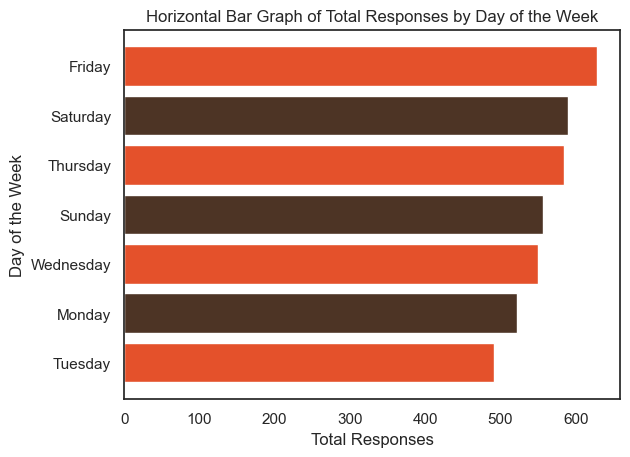

In [77]:
# Sort the DataFrame based on the 'Total_Responses' column in descending order
reachability_by_day_sorted = reachability_by_day.sort_values(by='Total_Responses', ascending=True)

# Use Viridis color palette
colors = ['#E4512B', '#4D3425']
#viridis_palette = sns.color_palette('viridis', len(reachability_by_day_sorted))

# Plot a horizontal bar graph
plt.barh(reachability_by_day_sorted.index, reachability_by_day_sorted['Total_Responses'], color=colors)
plt.title('Horizontal Bar Graph of Total Responses by Day of the Week')
plt.xlabel('Total Responses')
plt.ylabel('Day of the Week')
plt.show()



- From this Insight we clearly see most customers reachability is on Friday while Tuesday has few customer's reachabilty

### We  plot Agents against conversion. This will enable us see how agents performed as per the conversion rate!

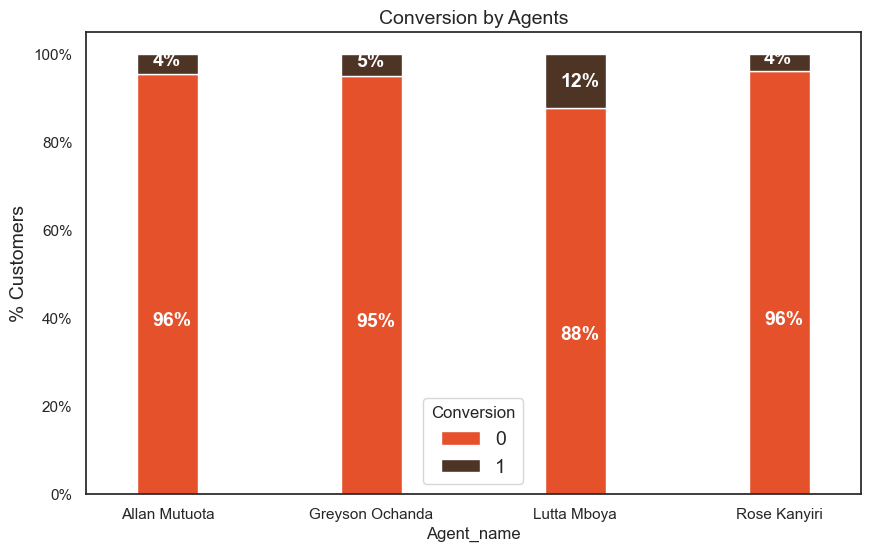

In [30]:

colors = ['#E4512B', '#4D3425']
agents_performance = df2.groupby(['Agent_name', 'Converted?']).size().unstack()

# Calculate total percentage for each agent and sort
agents_total_percentage = (agents_performance.T * 100.0 / agents_performance.T.sum()).T
agents_total_percentage['Total_Percentage'] = agents_total_percentage.sum(axis=1)
agents_total_percentage_sorted = agents_total_percentage.sort_values(by='Total_Percentage', ascending=False)

# Plot the sorted stacked bar chart
ax = (agents_total_percentage_sorted.drop('Total_Percentage', axis=1)
      .plot(kind='bar', width=0.3, stacked=True, rot=0, figsize=(10, 6), color=colors))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best', prop={'size': 14}, title='Conversion')
ax.set_ylabel('% Customers', size=14)
ax.set_title('Conversion by Agents', size=14)

# Adding labels on the sorted stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + .25 * width, p.get_y() + .4 * height), color='white', weight='bold', size=14)

plt.show()


- We can clearly see the Agents performance where we can  see Lutta Mboya emerged as the best Agent and  converted   by 12 %  while the least agent had 4 % conversion

### we need to analyze again the agents performance on the number of clients contacted rather than considering the conversion rate


In [78]:
agent_performance = df2.groupby('Agent_name')['Converted?'].value_counts().unstack()
agent_performance

Converted?,0,1
Agent_name,,
Allan Mutuota,579,27
Greyson Ochanda,460,24
Lutta Mboya,329,46
Rose Kanyiri,477,19


- From this insight we find that Allan Mutuota conatacted so many clients but conversion was low, compared to Lutta Mboya who contacted almost half of what Allan contacted but his conversion was Incredibly high.This means Lutta has conversion best skills. 

#  Uncovered Metrics:
## Financial Impact:
### We Calculate the financial impact by assessing the revenue per day before and after the weekly plan for converted customers.
 
 


In [87]:
total_revenue_before=df2[df2['Converted?']==1]['revenue_per_day_beforeweekly'].sum()
total_revenue_before

4107.0

In [88]:
total_revenue_after = df2[df2['Converted?'] == 1]['revenue_per_day_afterweekly'].sum()
total_revenue_after


5576.0

In [89]:
financial_impact = total_revenue_after - total_revenue_before
print(f"Financial Impact: KES {financial_impact:.2f}")

Financial Impact: KES 1469.00


In [90]:
Average_financial_impact=financial_impact/len(df2[df2['Converted?'] == 1])
print(f"Average Financial Impact per  customer after conversion : KES {Average_financial_impact:.2f}")


Average Financial Impact per  customer after conversion : KES 12.66


- Before the weekly Revenue the total daily  revenue from the converted customers used to be Kshs 4107.

- After subscribing to the weekly billing the total daily  revenue from the converted customers is now  Kshs 5576.

- This represents  a daily revenue increment by Kshs 1469 or 35.77 %.

Converting customers to the weekly billing plan results in reduced deliquency hence optimizing revenue.

### We need to know the number of customers that rejected the offer with specific reason and find the insights on how we can help or improve the plan.

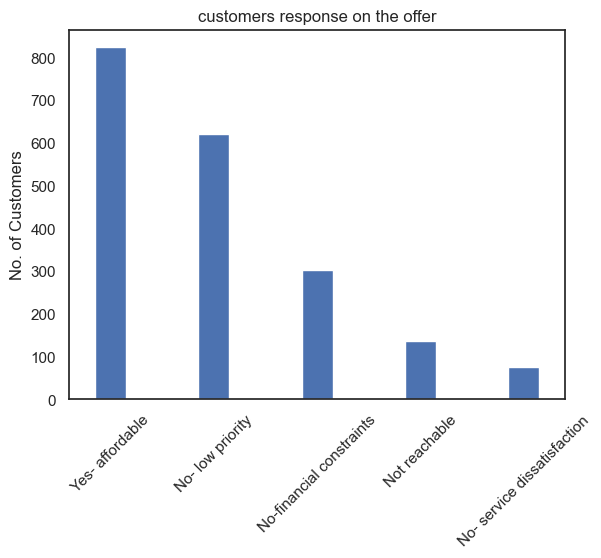

In [91]:
ax = df2['Response'].value_counts().plot(kind = 'bar',rot = 90, width = 0.3)
ax.set_ylabel('No. of Customers')
ax.set_title('customers response on the offer')
plt.xticks(rotation=45)

plt.show()



- We find that customers who find the offer affordable were leading while the one who said service dissatifaction were the lowest. This will further lead us to identify how many customers who said the offer was affordable opted to purchase the offer


# RECOMMENDATIONS .

# Data Story and Recommendations:



Performance Overview:
The conversion rate indicates the success of the periodic billing pilot. Analyzing reachability by day of the week could help in optimizing the timing of calls. Individual agent performance can highlight top performers.
 
Financial Impact:The financial impact, considering the revenue per day before and after the weekly plan, provides insights into the economic success of the pilot.
 
Recommendations:
Continue Optimization: Analyze the reachability patterns and schedule calls during days/times when customers are more likely to answer i.e on Fridays most customers were reached
 
Recognize Top Performers: Identify top-performing agents and share their strategies with others, implement Incentives for top performers and encourage Daily target. Also empahsize on Quality contacts that would drive better conversion rates.
 
Financial Assessment: Regularly assess the financial impact to ensure the pilot is economically viable.
 
Explore Non-Converted Reasons: Understand reasons behind "No" responses and explore whether addressing these issues can improve conversion rates. For customers that have customer dissatisfaction the company should identify the reasons and introduce more offers.
 
Explore Further Opportunities: Investigate if there are other customer segments or plans that could be introduced based on the data trends.
 
Feedback Loop: Establish a feedback loop with customer retention agents to gather qualitative insights and continuously refine strategies.
 
By combining quantitative and qualitative insights, the company can make informed decisions to enhance the pilot's performance and customer satisfaction. Regular monitoring and adaptation based on feedback will be key to long-term success.